## 문제정의
- Kaggle titanic

## 데이터 수집

In [1]:
import pandas as pd
titanic = pd.read_csv("./data/titanic/train.csv",index_col='PassengerId')
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## 데이터 전처리

### 문자형 데이터를 정수형으로 변환

In [2]:
titanic['Embarked'] = titanic['Embarked'].map({'S':1,'C':2,'Q':3})
titanic['Sex'] = titanic['Sex'].map({'male':1,'female':2})
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,2.0
3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,1.0
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,1.0
888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,B42,1.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,W./C. 6607,23.4500,NaN,1.0


In [3]:
for i in range(891):
    if (pd.notnull(titanic['Cabin'].iloc[i])):
        titanic['Cabin'].iloc[i] = titanic['Cabin'].iloc[i][0]

C:\Users\smhrd\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [4]:
titanic['Cabin'][pd.notnull(titanic['Cabin'])].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [5]:
titanic['Cabin'] = titanic['Cabin'].map({'A':1,'B':1,'C':1,'D':1,'E':1,'F':1,'G':1,'T':1})

In [6]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,1.0,2.0
3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,1.0,1.0
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,1.0
888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,1.0,1.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,W./C. 6607,23.4500,NaN,1.0


### 불필요한 컬럼 제거

In [7]:
del titanic['Name']
del titanic['Ticket']

### 결측지 확인

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    float64
 8   Embarked  889 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 69.6 KB


### 결측지 제거

#### 수치형 데이터간 상관 관계를 확인

In [9]:
titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,NaN,0.108669
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,NaN,0.043835
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,NaN,0.118593
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,NaN,0.012186
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,NaN,-0.060606
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,NaN,-0.079320
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,NaN,0.063462
Cabin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,0.108669,0.043835,0.118593,0.012186,-0.060606,-0.079320,0.063462,NaN,1.000000


In [10]:
titanic[['Pclass','Sex','Age']].groupby(by = ['Pclass','Sex']).median()

Age
Pclass Sex      
1      1    40.0
       2    35.0
2      1    30.0
       2    28.0
3      1    25.0
       2    21.5

In [11]:
for i in range(891):
    if (pd.isnull(titanic.iloc[i]['Age'])):
        if (titanic.iloc[i]['Sex']==1):
            if(titanic.iloc[i]['Pclass']==1):
                titanic['Age'].iloc[i] = 40
            elif(titanic.iloc[i]['Pclass']==2):
                titanic['Age'].iloc[i] = 30
            else:
                titanic['Age'].iloc[i] = 25
        else:
            if(titanic.iloc[i]['Pclass']==1):
                titanic['Age'].iloc[i] = 35
            elif(titanic.iloc[i]['Pclass']==2):
                titanic['Age'].iloc[i] = 28
            else:
                titanic['Age'].iloc[i] = 22

C:\Users\smhrd\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [12]:
titanic['Cabin'][pd.isnull(titanic['Cabin'])]=0

C:\Users\smhrd\AppData\Local\Temp/ipykernel_13604/3917771703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Cabin'][pd.isnull(titanic['Cabin'])]=0


In [13]:
titanic['Embarked'][pd.isnull(titanic['Embarked'])]=1

C:\Users\smhrd\AppData\Local\Temp/ipykernel_13604/2901830325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Embarked'][pd.isnull(titanic['Embarked'])]=1


In [14]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0.0,1.0
2,1,1,2,38.0,1,0,71.2833,1.0,2.0
3,1,3,2,26.0,0,0,7.9250,0.0,1.0
4,1,1,2,35.0,1,0,53.1000,1.0,1.0
5,0,3,1,35.0,0,0,8.0500,0.0,1.0
...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,0.0,1.0
888,1,1,2,19.0,0,0,30.0000,1.0,1.0
889,0,3,2,22.0,1,2,23.4500,0.0,1.0


In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    float64
 8   Embarked  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 69.6 KB


### 이상치 확인

In [16]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,1.352413,29.135993,0.523008,0.381594,32.204208,0.228956,1.361392
std,0.486592,0.836071,0.477990,13.291339,1.102743,0.806057,49.693429,0.420397,0.635673
min,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,1.000000,22.000000,0.000000,0.000000,7.910400,0.000000,1.000000
50%,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,2.000000,36.000000,1.000000,0.000000,31.000000,0.000000,2.000000
max,1.000000,3.000000,2.000000,80.000000,8.000000,6.000000,512.329200,1.000000,3.000000


### 이상치 제거

In [17]:
titanic['Age'] = titanic['Age']//1

In [18]:
for i in range(891):
    if (pd.isnull(titanic.iloc[i]['Cabin'])):
        if (titanic.iloc[i]['Pclass']==1):
            titanic['Cabin'].iloc[i]=3
        elif (titanic.iloc[i]['Pclass']==2):
            titanic['Cabin'].iloc[i]=5
        else:
            titanic['Cabin'].iloc[i]=6

In [19]:
titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,1.000000,-0.338481,0.543351,-0.058871,-0.035322,0.081629,0.257307,0.316912,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.412588,0.083081,0.018443,-0.549500,-0.725541,0.045702
Sex,0.543351,-0.131900,1.000000,-0.099989,0.114631,0.245489,0.182333,0.140391,0.116569
Age,-0.058871,-0.412588,-0.099989,1.000000,-0.248990,-0.175857,0.122394,0.276426,-0.054314
SibSp,-0.035322,0.083081,0.114631,-0.248990,1.000000,0.414838,0.159651,-0.040460,-0.059961
Parch,0.081629,0.018443,0.245489,-0.175857,0.414838,1.000000,0.216225,0.036987,-0.078665
Fare,0.257307,-0.549500,0.182333,0.122394,0.159651,0.216225,1.000000,0.482075,0.062142
Cabin,0.316912,-0.725541,0.140391,0.276426,-0.040460,0.036987,0.482075,1.000000,0.013774
Embarked,0.106811,0.045702,0.116569,-0.054314,-0.059961,-0.078665,0.062142,0.013774,1.000000


In [20]:
titanic['Fare'][titanic['Fare']<8]=8

C:\Users\smhrd\AppData\Local\Temp/ipykernel_13604/637036922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Fare'][titanic['Fare']<8]=8


In [21]:
titanic['Fare'][titanic['Fare']>=200]=200

C:\Users\smhrd\AppData\Local\Temp/ipykernel_13604/1609469039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Fare'][titanic['Fare']>=200]=200


### 탐색적 데이터 분석

In [22]:
import seaborn as sns

<AxesSubplot:xlabel='Cabin', ylabel='count'>

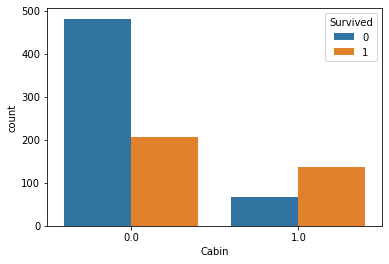

In [23]:
sns.countplot(data = titanic, x = 'Cabin', hue = 'Survived')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

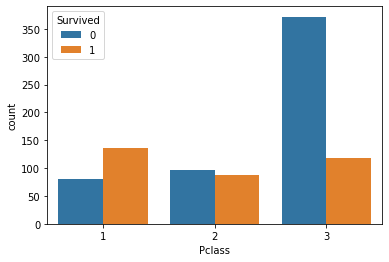

In [24]:
sns.countplot(data = titanic, x = 'Pclass', hue = 'Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

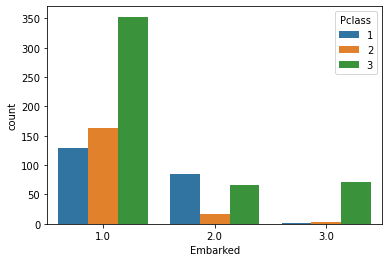

In [25]:
sns.countplot(data = titanic, x = 'Embarked', hue = 'Pclass')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

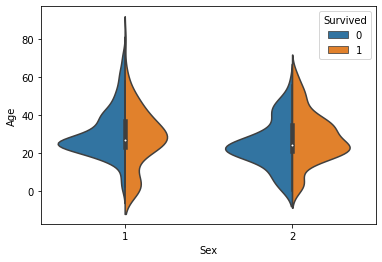

In [26]:
sns.violinplot(data = titanic, x = 'Sex', y = 'Age', hue = 'Survived', split = True)

In [27]:
# 특성 공학 : 컬럼에 연산을 통해서 의미있는 새로운 정보룰 추출하는 행위
titanic['family'] = titanic['SibSp']+titanic['Parch']+1
titanic['family']

PassengerId
1      2
2      2
3      1
4      2
5      1
      ..
887    1
888    1
889    4
890    1
891    1
Name: family, Length: 891, dtype: int64

<AxesSubplot:xlabel='family', ylabel='count'>

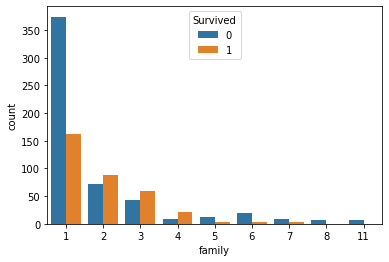

In [28]:
sns.countplot(data = titanic, x = 'family', hue = 'Survived')

In [29]:
bins=[0,1,4,20]

In [30]:
#1 : alone, 2 : 2~4, 3 : more than 4
labels=[1,2,3]

In [31]:
titanic['familyGroup'] = pd.cut(titanic['family'],bins=bins,labels=labels)
titanic['familyGroup']

PassengerId
1      2
2      2
3      1
4      2
5      1
      ..
887    1
888    1
889    2
890    1
891    1
Name: familyGroup, Length: 891, dtype: category
Categories (3, int64): [1 < 2 < 3]

<AxesSubplot:xlabel='familyGroup', ylabel='count'>

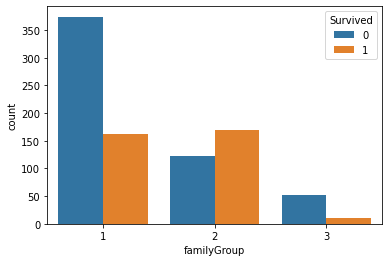

In [32]:
sns.countplot(data = titanic, x = 'familyGroup', hue = 'Survived')

In [33]:
titanic['F/P'] = titanic['Fare']/titanic['Pclass']

In [34]:
ageBins = [-1,10,20,30,40,50,60,70,80,90,100,200]
ageLabels = [0,1,2,3,4,5,6,7,8,9,10]
titanic['AgeGroup'] = pd.cut(titanic['Age'],bins=ageBins,labels=ageLabels)
titanic['AgeGroup']

PassengerId
1      2
2      3
3      2
4      3
5      3
      ..
887    2
888    1
889    2
890    2
891    3
Name: AgeGroup, Length: 891, dtype: category
Categories (11, int64): [0 < 1 < 2 < 3 ... 7 < 8 < 9 < 10]

In [35]:
titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,family,F/P
Survived,1.000000,-0.338481,0.543351,-0.058871,-0.035322,0.081629,0.283180,0.316912,0.106811,0.016639,0.295332
Pclass,-0.338481,1.000000,-0.131900,-0.412588,0.083081,0.018443,-0.634378,-0.725541,0.045702,0.065997,-0.692039
Sex,0.543351,-0.131900,1.000000,-0.099989,0.114631,0.245489,0.220637,0.140391,0.116569,0.200988,0.204868
Age,-0.058871,-0.412588,-0.099989,1.000000,-0.248990,-0.175857,0.142998,0.276426,-0.054314,-0.258031,0.197451
SibSp,-0.035322,0.083081,0.114631,-0.248990,1.000000,0.414838,0.200627,-0.040460,-0.059961,0.890712,0.076147
Parch,0.081629,0.018443,0.245489,-0.175857,0.414838,1.000000,0.249113,0.036987,-0.078665,0.783111,0.157898
Fare,0.283180,-0.634378,0.220637,0.142998,0.200627,0.249113,1.000000,0.559702,0.046806,0.261574,0.982048
Cabin,0.316912,-0.725541,0.140391,0.276426,-0.040460,0.036987,0.559702,1.000000,0.013774,-0.009175,0.617908
Embarked,0.106811,0.045702,0.116569,-0.054314,-0.059961,-0.078665,0.046806,0.013774,1.000000,-0.080281,0.066004
family,0.016639,0.065997,0.200988,-0.258031,0.890712,0.783111,0.261574,-0.009175,-0.080281,1.000000,0.130927


## 데이터 셋 구성하기

### 문제와 정답으로 분리

In [36]:
X=titanic[['Sex','F/P']]
y = titanic['Survived']
X,y

(             Sex        F/P
 PassengerId                
 1              1   2.666667
 2              2  71.283300
 3              2   2.666667
 4              2  53.100000
 5              1   2.683333
 ...          ...        ...
 887            1   6.500000
 888            2  30.000000
 889            2   7.816667
 890            1  30.000000
 891            1   2.666667
 
 [891 rows x 2 columns],
 PassengerId
 1      0
 2      1
 3      1
 4      1
 5      0
       ..
 887    0
 888    1
 889    0
 890    1
 891    0
 Name: Survived, Length: 891, dtype: int64)

In [37]:
from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X,y,test_size = 0.3,random_state = 2)

In [38]:
XTrain, XTest, yTrain, yTest

(             Sex         F/P
 PassengerId                 
 452            1    6.655567
 346            2    6.500000
 688            1    3.390267
 280            2    6.750000
 743            2  200.000000
 ...          ...         ...
 535            2    2.887500
 585            1    2.904167
 494            1   49.504200
 528            1  200.000000
 169            1   25.925000
 
 [623 rows x 2 columns],
              Sex        F/P
 PassengerId                
 708            1  26.287500
 38             1   2.683333
 616            2  32.500000
 170            1  18.831933
 69             2   2.666667
 ...          ...        ...
 843            2  31.000000
 672            1  52.000000
 697            1   2.683333
 43             1   2.666667
 397            2   2.666667
 
 [268 rows x 2 columns],
 PassengerId
 452    0
 346    1
 688    0
 280    1
 743    1
       ..
 535    0
 585    0
 494    0
 528    0
 169    0
 Name: Survived, Length: 623, dtype: int64,
 PassengerId

## 모델 선택 및 하이퍼 파라미터 튜닝

### 모델 선택_KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

### 하이퍼 파라미터 튜닝

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
parameterGrid = {
    'n_neighbors' : range(1,51),
    'p' : [1,2],
    'weights' : ['uniform','distance']
}

In [42]:
grid = GridSearchCV(KNeighborsClassifier(), parameterGrid, cv = 5)

### 학습

In [43]:
grid.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51), 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

### 평가

In [44]:
grid.best_score_

0.8193459293201932

In [45]:
grid.best_params_

{'n_neighbors': 8, 'p': 2, 'weights': 'distance'}

### 모델 선택 _ TreeModel

In [46]:
from sklearn.tree import DecisionTreeClassifier

## TestData

### 불러오기

In [47]:
test = pd.read_csv("./data/titanic/test.csv",index_col="PassengerId")
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


### 전처리

#### 문자형 데이터 숫자형으로 변환

In [48]:
test['Embarked'] = test['Embarked'].map({'S':1,'C':2,'Q':3})
test['Sex'] = test['Sex'].map({'male':1,'female':2})

In [49]:
for i in range(418):
    if (pd.notnull(test['Cabin'].iloc[i])):
        test['Cabin'].iloc[i] = test['Cabin'].iloc[i][0]

C:\Users\smhrd\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [50]:
test['Cabin'].value_counts()

C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: Cabin, dtype: int64

In [51]:
test['Cabin'] = test['Cabin'].map({'A':1,'B':1,'C':1,'D':1,'E':1,'F':1,'G':1,'T':1})

#### 불필요한 컬럼 제거

In [52]:
del test['Name']
del test['Ticket']

#### 결측지 확인

In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Cabin     91 non-null     float64
 7   Embarked  418 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 29.4 KB


#### 결측지 제거

In [54]:
test[['Pclass','Sex','Age']].groupby(by = ['Pclass','Sex']).median()

Age
Pclass Sex      
1      1    42.0
       2    41.0
2      1    28.0
       2    24.0
3      1    24.0
       2    22.0

In [55]:
for i in range(418):
    if (pd.isnull(test.iloc[i]['Age'])):
        if (test.iloc[i]['Sex']==1):
            if(test.iloc[i]['Pclass']==1):
                test['Age'].iloc[i] = 42
            elif(test.iloc[i]['Pclass']==2):
                test['Age'].iloc[i] = 28
            else:
                test['Age'].iloc[i] = 24
        else:
            if(test.iloc[i]['Pclass']==1):
                test['Age'].iloc[i] = 41
            elif(test.iloc[i]['Pclass']==2):
                test['Age'].iloc[i] = 24
            else:
                test['Age'].iloc[i] = 22

C:\Users\smhrd\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [56]:
test['Cabin'][pd.isnull(test['Cabin'])]=0

C:\Users\smhrd\AppData\Local\Temp/ipykernel_13604/1678956821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Cabin'][pd.isnull(test['Cabin'])]=0


In [57]:
test['Fare'][pd.isnull(test['Fare'])]=8.0000

C:\Users\smhrd\AppData\Local\Temp/ipykernel_13604/1672224348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Fare'][pd.isnull(test['Fare'])]=8.0000


In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Cabin     418 non-null    float64
 7   Embarked  418 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 29.4 KB


#### 이상치 확인

In [59]:
test.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,1.363636,29.297847,0.447368,0.392344,35.561095,0.217703,1.464115
std,0.841838,0.481622,13.038856,0.896760,0.981429,55.856848,0.413179,0.685516
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,22.000000,0.000000,0.000000,7.895800,0.000000,1.000000
50%,3.000000,1.000000,25.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,3.000000,2.000000,36.375000,1.000000,0.000000,31.471875,0.000000,2.000000
max,3.000000,2.000000,76.000000,8.000000,9.000000,512.329200,1.000000,3.000000


#### 이상치 제거

In [60]:
test['Age'] = test['Age']//1

In [61]:
test['Fare'][test['Fare']<8]=8

C:\Users\smhrd\AppData\Local\Temp/ipykernel_13604/1087081510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Fare'][test['Fare']<8]=8


In [62]:
test['Fare'][test['Fare']>=200]=200

C:\Users\smhrd\AppData\Local\Temp/ipykernel_13604/981238444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Fare'][test['Fare']>=200]=200


#### 컬럼 생성

In [63]:
# 특성 공학 : 컬럼에 연산을 통해서 의미있는 새로운 정보룰 추출하는 행위
test['family'] = test['SibSp']+test['Parch']+1
test['family']

PassengerId
892     1
893     2
894     1
895     1
896     3
       ..
1305    1
1306    1
1307    1
1308    1
1309    3
Name: family, Length: 418, dtype: int64

In [64]:
test['familyGroup'] = pd.cut(test['family'],bins=bins,labels=labels)
test['familyGroup']

PassengerId
892     1
893     2
894     1
895     1
896     2
       ..
1305    1
1306    1
1307    1
1308    1
1309    2
Name: familyGroup, Length: 418, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [65]:
test['F/P'] = test['Fare']/test['Pclass']

In [66]:
test['AgeGroup'] = pd.cut(test['Age'],bins=ageBins,labels=ageLabels)
test['AgeGroup']

PassengerId
892     3
893     4
894     6
895     2
896     2
       ..
1305    2
1306    3
1307    3
1308    2
1309    2
Name: AgeGroup, Length: 418, dtype: category
Categories (11, int64): [0 < 1 < 2 < 3 ... 7 < 8 < 9 < 10]

#### 테스트 셋 구성

In [67]:
test=test[['Sex','F/P']]

## 예측

### 모델 생성_KNN

In [68]:
knn_model = KNeighborsClassifier(n_neighbors=8,p=2, weights='distance')

### 학습

In [69]:
knn_model.fit(X,y)

KNeighborsClassifier(n_neighbors=8, weights='distance')

### 예측

In [70]:
result = knn_model.predict(test)
result

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

### csv로 내보내기

In [71]:
dfResult = pd.DataFrame(result,columns=['result'])
dfResult

,result
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [72]:
dfResult.to_csv("./data/titanic/result.csv",encoding="euc-kr")

### 모델 생성_TreeModel

In [73]:
treeModel = DecisionTreeClassifier()

### 학습

In [74]:
treeModel.fit(X,y)

DecisionTreeClassifier()

In [75]:
treeModel.feature_importances_

array([0.4383463, 0.5616537])

### 예측

In [76]:
resultTree = treeModel.predict(test)
resultTree

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

### csv로 내보내기

In [77]:
dfResultTree = pd.DataFrame(resultTree,columns=['result'])
dfResultTree

,result
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [78]:
dfResultTree.to_csv("./data/titanic/resultTree.csv",encoding="euc-kr")

### 모델 생성_RandomForest

In [79]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=200)

### 학습

In [80]:
forest.fit(X,y)

RandomForestClassifier(n_estimators=200)

In [81]:
forest.feature_importances_

array([0.3694473, 0.6305527])

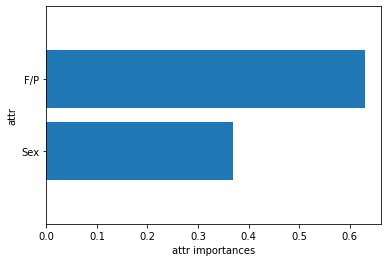

In [82]:
import numpy as np
import matplotlib.pyplot as plt

plt.barh(range(2), forest.feature_importances_)
# 축 번호에 축 이름을 출력
plt.yticks(np.arange(2), X.columns)
plt.xlabel("attr importances")
plt.ylabel("attr")
plt.ylim(-1, 2)
plt.show()

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
result = cross_val_score(forest,X,y,cv=10)
result.mean()

0.813732833957553

### 예측

In [85]:
resultForest = forest.predict(test)
resultForest

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

### csv로 내보내기

In [86]:
dfResultForest = pd.DataFrame(resultForest,columns=['result'])
dfResultForest

,result
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [87]:
dfResultForest.to_csv("./data/titanic/resultForest.csv",encoding="euc-kr")

## 데이터 스케일링

In [88]:
from sklearn.preprocessing import RobustScaler, StandardScaler

### RobustScaler

In [89]:
rbScaler = RobustScaler()

In [90]:
# 어떤 컬럼에는 어떤 값으로 변경해야 하는지
rbScaler.fit(X)

RobustScaler()

In [91]:
XRb = rbScaler.transform(X)
testRb = rbScaler.transform(test)

In [92]:
XRb

array([[ 0.        , -0.18683997],
       [ 1.        ,  3.15759383],
       [ 1.        , -0.18683997],
       ...,
       [ 1.        ,  0.06417547],
       [ 0.        ,  1.14541024],
       [ 0.        , -0.18683997]])

In [93]:
testRb

array([[ 0.00000000e+00, -1.86839968e-01],
       [ 1.00000000e+00, -1.86839968e-01],
       [ 0.00000000e+00, -8.07270512e-02],
       [ 0.00000000e+00, -1.76076361e-01],
       [ 1.00000000e+00, -1.17181154e-01],
       [ 0.00000000e+00, -1.66937449e-01],
       [ 1.00000000e+00, -1.86839968e-01],
       [ 0.00000000e+00,  3.89926889e-01],
       [ 1.00000000e+00, -1.86839968e-01],
       [ 0.00000000e+00,  7.55483347e-02],
       [ 0.00000000e+00, -1.86839968e-01],
       [ 0.00000000e+00,  9.50446791e-01],
       [ 1.00000000e+00,  3.69293420e+00],
       [ 0.00000000e+00,  3.16815597e-01],
       [ 1.00000000e+00,  2.66490658e+00],
       [ 1.00000000e+00,  3.58752234e-01],
       [ 0.00000000e+00, -1.58407799e-02],
       [ 0.00000000e+00, -1.86839968e-01],
       [ 1.00000000e+00, -1.86839968e-01],
       [ 1.00000000e+00, -1.86839968e-01],
       [ 0.00000000e+00,  2.57839155e+00],
       [ 0.00000000e+00, -1.86839968e-01],
       [ 1.00000000e+00,  1.22745573e+00],
       [ 0.

#### RandomForest 모델 확인

In [94]:
result = cross_val_score(forest,X,y,cv=10)
result.mean()

0.8125967540574284

In [95]:
result = cross_val_score(forest,XRb,y,cv=10)
result.mean()

0.813732833957553

#### KNN 모델 확인

In [96]:
result = cross_val_score(knn_model,X,y,cv=10)
result.mean()

0.8059425717852683

In [97]:
result = cross_val_score(knn_model,XRb,y,cv=10)
result.mean()

0.8227840199750311

### StandardScaler

In [98]:
stScaler = StandardScaler()

In [99]:
stScaler.fit(X)

StandardScaler()

In [100]:
XSt = stScaler.transform(X)
testSt = stScaler.transform(test)

In [101]:
XSt

array([[-0.73769513, -0.51365188],
       [ 1.35557354,  1.1872003 ],
       [ 1.35557354, -0.51365188],
       ...,
       [ 1.35557354, -0.38599495],
       [-0.73769513,  0.16388004],
       [-0.73769513, -0.51365188]])

In [102]:
testSt

array([[-0.73769513, -0.51365188],
       [ 1.35557354, -0.51365188],
       [-0.73769513, -0.45968688],
       [-0.73769513, -0.50817792],
       [ 1.35557354, -0.47822605],
       [-0.73769513, -0.50353022],
       [ 1.35557354, -0.51365188],
       [-0.73769513, -0.22033013],
       [ 1.35557354, -0.51365188],
       [-0.73769513, -0.38021114],
       [-0.73769513, -0.51365188],
       [-0.73769513,  0.06472903],
       [ 1.35557354,  1.45945411],
       [-0.73769513, -0.25751176],
       [ 1.35557354,  0.93663825],
       [ 1.35557354, -0.23618438],
       [-0.73769513, -0.42668818],
       [-0.73769513, -0.51365188],
       [ 1.35557354, -0.51365188],
       [ 1.35557354, -0.51365188],
       [-0.73769513,  0.89263999],
       [-0.73769513, -0.51365188],
       [ 1.35557354,  0.20560527],
       [-0.73769513,  0.94169991],
       [ 1.35557354,  4.37779811],
       [-0.73769513, -0.45994508],
       [ 1.35557354,  0.95657256],
       [-0.73769513, -0.51365188],
       [-0.73769513,

#### RandomForest 모델 확인

In [103]:
result = cross_val_score(forest,X,y,cv=10)
result.mean()

0.813732833957553

In [104]:
result = cross_val_score(forest,XSt,y,cv=10)
result.mean()

0.812609238451935

#### KNN 모델 확인

In [105]:
result = cross_val_score(knn_model,X,y,cv=10)
result.mean()

0.8059425717852683

In [106]:
result = cross_val_score(knn_model,XSt,y,cv=10)
result.mean()

0.8227840199750311